In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('insurance.csv')

No handles with labels found to put in legend.


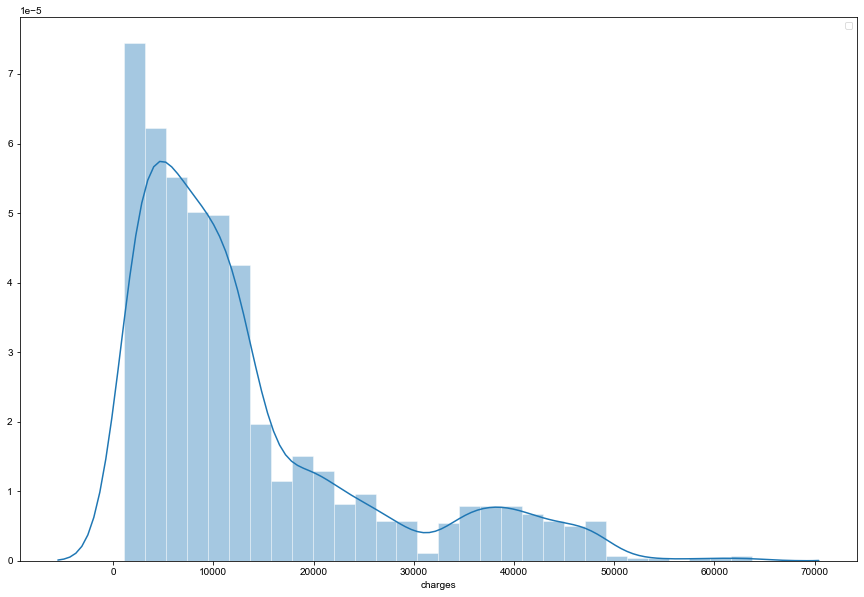

In [3]:
f, ax = plt.subplots(figsize=(15,10))
sns.set(style="ticks")
sns.distplot(dataset['charges'])
sns.set_context("paper")
ax.legend(ncol= 2, loc ="upper right",frameon =True)
plt.show()

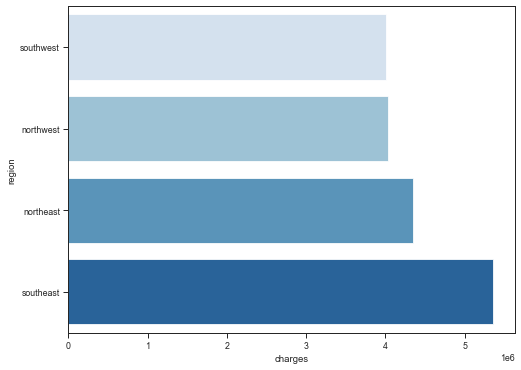

In [4]:
charges = dataset['charges'].groupby(dataset.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

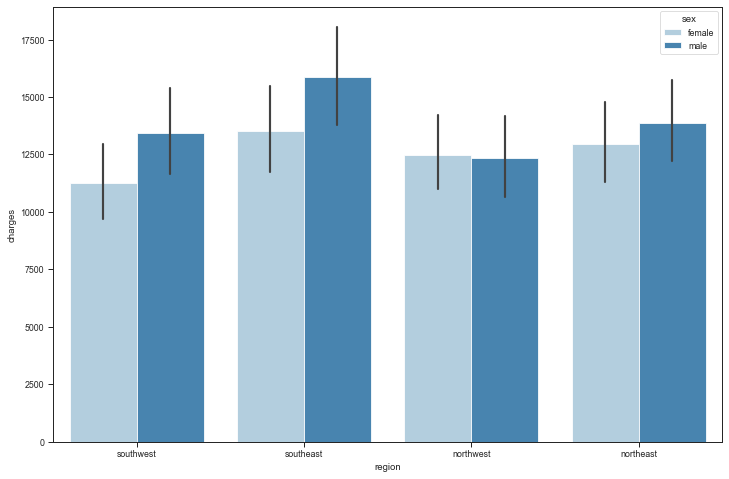

In [5]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=dataset, palette='Blues')

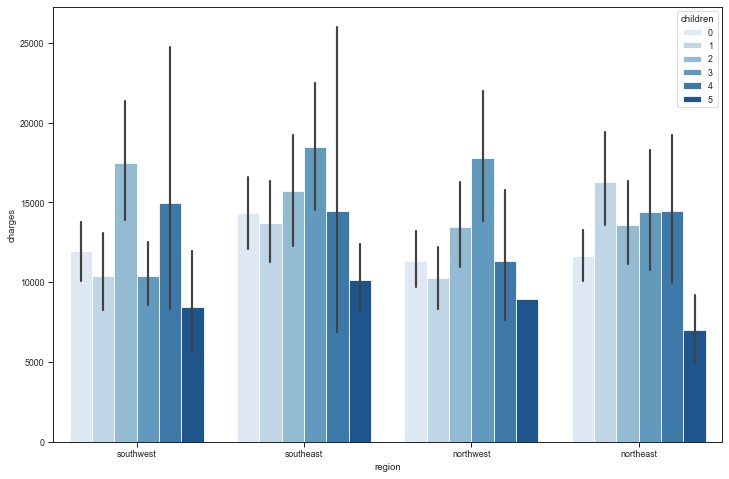

In [6]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=dataset, palette='Blues')

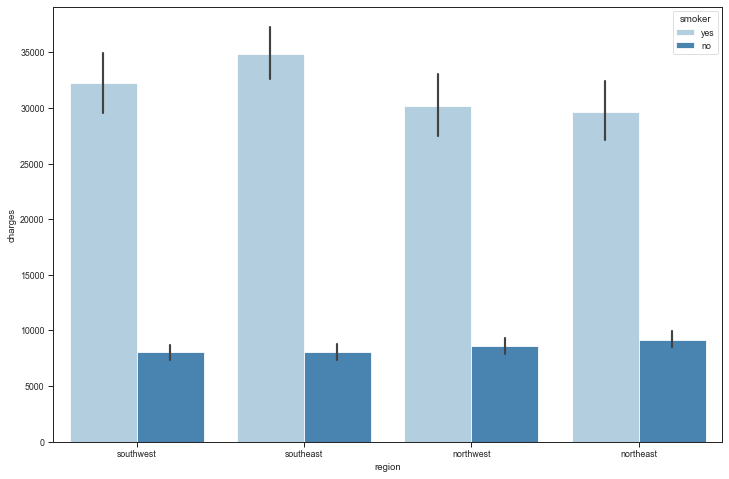

In [7]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='smoker', data=dataset, palette='Blues')

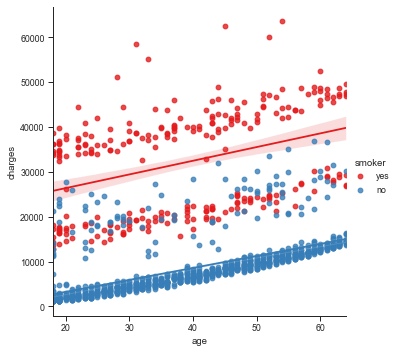

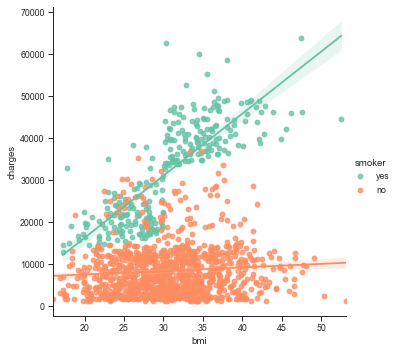

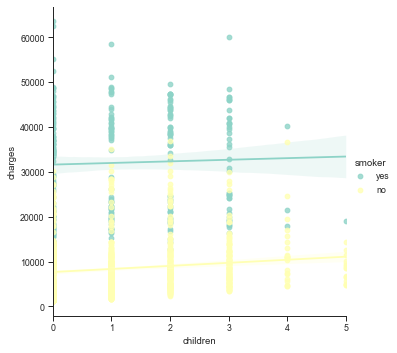

In [8]:
ax = sns.lmplot(x = 'age', y = 'charges', data=dataset, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=dataset, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=dataset, hue='smoker', palette='Set3')

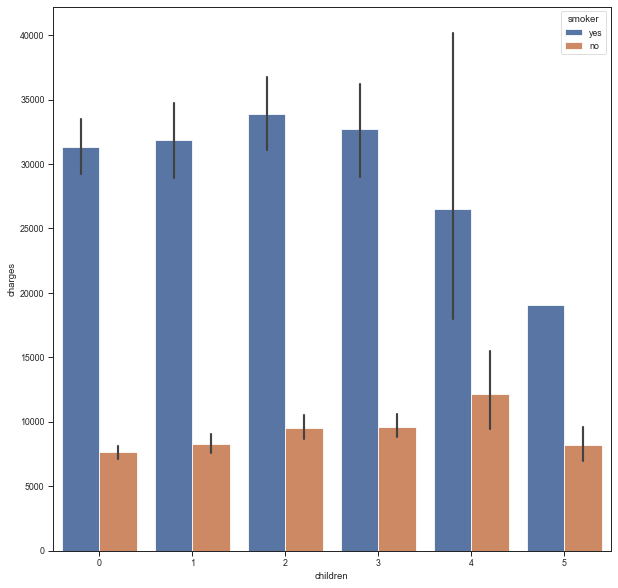

In [9]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.barplot(x = 'children', y = 'charges', data=dataset, hue='smoker')

In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(dataset.sex.drop_duplicates())
dataset.sex = label.transform(dataset.sex)
label.fit(dataset.smoker.drop_duplicates())
dataset.smoker = label.transform(dataset.smoker)
label.fit(dataset.region.drop_duplicates())
dataset.region = label.transform(dataset.region)
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = dataset.drop(['charges'], axis = 1)
y = dataset['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)

print(model.score(x_test, y_test))

0.7998747145449959


In [18]:
trained_data_predicted = model.predict(x_train)
trained_data_predicted

array([33388.19026849,  3615.42984257, 30678.69073769, ...,
        6132.68612727,  4519.17314626,  2373.39921419])

In [19]:
R_square_error = metrics.r2_score(y_train,trained_data_predicted)
Mean_absolute_error = metrics.mean_absolute_error(y_train,trained_data_predicted)
print("R Squared error: ",R_square_error)
print("Mean absolute_error: ",Mean_absolute_error)

R Squared error:  0.7368306228430945
Mean absolute_error:  4235.383876032092


63770.42801


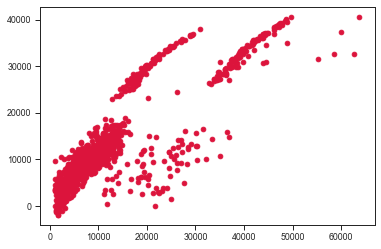

In [20]:
plt.scatter(y_train,trained_data_predicted,c='crimson')
p1 = max(max(trained_data_predicted),max(y_train))
p2 = min(min(trained_data_predicted),min(y_train))
print(p1)

In [34]:
from sklearn.preprocessing import PolynomialFeatures
x = dataset.drop(['charges', 'sex', 'region'], axis = 1)
y = dataset.charges
pred = PolynomialFeatures (degree = 2)
x_pred = pred.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pred, y, test_size=0.2, random_state=0)

x_pred = pred.fit_transform(x)
model2 = LinearRegression()
model2.fit(x_pred, y)
y_train_pred = model2.predict(x_pred)
y_test_pred = model2.predict(x_test)
y_train_pred = pd.DataFrame(y_test_pred,y_test)
y_train_pred

,0
charges,
9724.53000,11966.063428
8547.69130,10229.439925
45702.02235,48438.408299
12950.07120,14438.010327
9644.25250,8662.467605
...,...
15019.76005,16738.586731
6664.68595,8410.030837
20709.02034,12526.155660
